<a href="https://colab.research.google.com/github/jieun-dot/e.g./blob/main/e.g._1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/diamonds.csv',index_col=0)

**carat과 price의 경향을 비교하기 위한 scatterplot그래프를 출력하시오**

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
import matplotlib.pyplot as plt

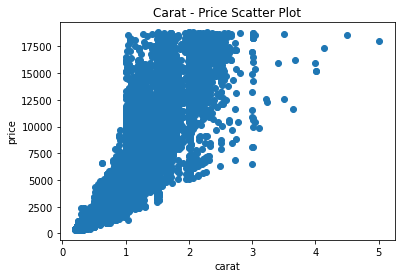

In [ ]:
plt.scatter('carat','price',data=df)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Carat - Price Scatter Plot')
plt.show()

**carat과 price사이의 상관계수와 상관계수의 p-value값은?**

In [ ]:
corr_ = df.corr()

In [ ]:
corr_

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
corr_.loc['carat','price']

0.9215913011935697

In [ ]:
from scipy import stats

In [ ]:
carat = df['carat']
price = df['price']

In [ ]:
stats.pearsonr(carat,price) # > (상관계수,p-value)   >> pvalue가 alpha(0.05)보다 작으므로 reject H0

(0.9215913011934771, 0.0)

**color에 따른 price 값의 분포는 아래와 같다.**

In [ ]:
import seaborn as sns

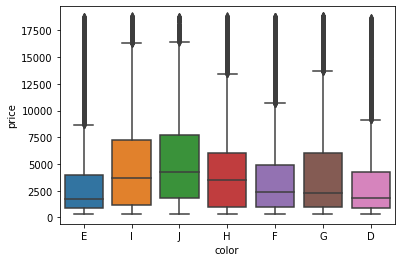

In [ ]:
sns.boxplot(x=df.color,y=df.price)
plt.show()

**Diamond의 평균가격은 3932로 알려져있다. ‘H’ color를 가지는 다이아몬드 집단의 평균에 대한 일표본 t검정을 시행하려한다. 통계량과 pvalue값을 구하시오. 유의수준 0.05에서 귀무가설 채택여부를 boolean 값으로 표현할 변수(hypo) 만들고 출력하시오**

In [ ]:
import scipy.stats as st

In [ ]:
H_color = df[df.color == 'H']

In [ ]:
st.ttest_1samp(H_color.price,3932)

Ttest_1sampResult(statistic=11.988997411117696, pvalue=7.569973305218302e-33)

In [ ]:
stat = st.ttest_1samp(H_color.price,3932)[0]
pvalue = st.ttest_1samp(H_color.price,3932)[1]
if pvalue > 0.05:
    hypo = True
else:
    hypo = False
print(stat, pvalue,hypo)

11.988997411117696 7.569973305218302e-33 False


**그래프상에서 ‘F’와 ‘G’는 평균이 유사해보인다.이를 확인하기 위해 집단간 등분산(levene,fligner,bartlett) 검정을 시행 후 결과를 출력하고조건에 맞는 독립표본 t검정을 시행하라**

In [ ]:
F_color = df[df.color == 'F']
G_color = df[df.color == 'G']

In [ ]:
st.levene(F_color.price,G_color.price)

LeveneResult(statistic=53.627886257416655, pvalue=2.511093007074788e-13)

In [ ]:
st.fligner(F_color.price,G_color.price)

FlignerResult(statistic=37.04347553879807, pvalue=1.155244880009172e-09)

In [ ]:
st.bartlett(F_color.price,G_color.price)   # reject H0 => F, G 분산은 같지않다

BartlettResult(statistic=47.52732212008511, pvalue=5.424264079418252e-12)

In [ ]:
st.ttest_ind(F_color.price,G_color.price)  # reject H0 => F,G 평균은 같지않다

Ttest_indResult(statistic=-5.01660972836768, pvalue=5.302368989571697e-07)

In [ ]:
print(F_color.price.mean(),G_color.price.mean())

3724.886396981765 3999.135671271697


**color ‘F’,’G’,’D’ 세집단의 price값들에 대해 anova분석을 시행하라.**

In [ ]:
st.f_oneway(F_color.price,G_color.price,df[df.color == 'D'].price)  # > reject H0 => 적어도 두 모집단의 평균이 서로 같지 않다.

F_onewayResult(statistic=101.1811790316069, pvalue=1.6513790091285713e-44)

**연속형 변수(carat,depth,table,price,x,y,z) 각각의 이상치(1,3분위값에서 IQR*1.5 외의 값) 갯수를 데이터 프레임(변수명 ratio_df, 비율의 내림차순 정렬)으로 아래와 같이 나타내어라.**

In [ ]:
carat = df.carat
depth = df.depth
table = df.table
price = df.price
x = df.x
y = df.y
z = df.z

In [ ]:
import numpy as np

def outlier_iqr_count(data):
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    outlier = (Q1 - 1.5*IQR > data)|(Q3 + 1.5*IQR < data )
    count = sum(outlier)
    return count

In [ ]:
d = {'col': ['carat','depth','table','price','x','y','z'], 'count': [outlier_iqr_count(carat),outlier_iqr_count(depth),outlier_iqr_count(table),
                                                                     outlier_iqr_count(price),outlier_iqr_count(x),outlier_iqr_count(y),
                                                                     outlier_iqr_count(z)]}

In [ ]:
d

{'col': ['carat', 'depth', 'table', 'price', 'x', 'y', 'z'],
 'count': [1889, 2545, 605, 3540, 32, 29, 49]}

In [ ]:
ratio_df = pd.DataFrame(d).sort_values(by='count',ascending=False)

In [ ]:
ratio_df

,col,count
3,price,3540
1,depth,2545
0,carat,1889
2,table,605
6,z,49
4,x,32
5,y,29


**color에 따른 price의 max, min, 평균값을 colorDf 변수에 저장하고 아래와 같이 출력하는 코드를 작성하라**

In [ ]:
df.pivot_table('price','color') 

,price
color,
D,3169.954096
E,3076.752475
F,3724.886397
G,3999.135671
H,4486.669196
I,5091.874954
J,5323.818020


In [ ]:
color = df.groupby('color')

In [ ]:
color['price'].aggregate(['mean','max','min'])

,mean,max,min
color,,,
D,3169.954096,18693,357
E,3076.752475,18731,326
F,3724.886397,18791,342
G,3999.135671,18818,354
H,4486.669196,18803,337
I,5091.874954,18823,334
J,5323.818020,18710,335


**전체 데이터중 color의 발생빈도수에 따라 labelEncoding(빈도수 적은것 : 1, 빈도수 증가할수록 1씩증가)을 하고 colorLabel 컬럼에 저장하고 cut에 따른 colorLabel의 평균값을 구하여라**

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
color_index =list(df.groupby('color').size().sort_values().index)
color_index

['J', 'I', 'D', 'H', 'F', 'E', 'G']

In [ ]:
for x,y in enumerate(color_index):
    print(x,y)

0 J
1 I
2 D
3 H
4 F
5 E
6 G


In [ ]:
dic= {x: i+1 for i, x in enumerate(list(df.groupby('color').size().sort_values().index))}

dic

{'D': 3, 'E': 6, 'F': 5, 'G': 7, 'H': 4, 'I': 2, 'J': 1}

In [ ]:
df['colorLabel'] = df['color'].map(lambda x: dic[x])

df['colorLabel']

1        6
2        6
3        6
4        2
5        1
        ..
53936    3
53937    3
53938    3
53939    4
53940    3
Name: colorLabel, Length: 53940, dtype: int64

In [ ]:
df.groupby('cut').agg({'colorLabel':['mean']})

,colorLabel
,mean
cut,
Fair,4.516770
Good,4.562780
Ideal,4.769152
Premium,4.644913
Very Good,4.654362


**price의 값에 따른 구간을 1000단위로 나누고 priceLabel 컬럼에 저장하라. 저장시 숫자 순으로 label하고(0 ~ 1000이하 : 0,
1000초과 ~ 2000미만 :1,
 …) 최종적으로 구간별 갯수(변수명:labelCount)를 출력하라**

In [ ]:
df.price

1         326
2         326
3         327
4         334
5         335
         ... 
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
df.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [ ]:
df['priceLabel'] = df['price'].apply(lambda x: x//1000)

df['priceLabel']

1        0
2        0
3        0
4        0
5        0
        ..
53936    2
53937    2
53938    2
53939    2
53940    2
Name: priceLabel, Length: 53940, dtype: int64

In [ ]:
df['priceLabel'].astype('category')

labelCount = df.groupby('priceLabel').size()

In [ ]:
labelCount

priceLabel
0     14499
1      9704
2      6131
3      4226
4      4653
5      3174
6      2278
7      1669
8      1307
9      1076
10      935
11      824
12      702
13      603
14      503
15      514
16      424
17      406
18      312
dtype: int64

In [ ]:
import pandas as pd

labelCount = pd.DataFrame(labelCount,columns=['count'])
labelCount

,count
priceLabel,
0,14499
1,9704
2,6131
3,4226
4,4653
5,3174
6,2278
7,1669
8,1307
